## Сборный проект

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры.
Нам необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года.

### План:

1. Открыть файл и изучить общую информацию, выявить проблемы в данных
2. Предобработка данных:
 - Заменить название столбцов (привести к нижнему регистру);
 - Привести данные к нужным типам;
 - Обработать пропуски:
    - изучить пропущенные значения и заполнить пропуски, где это возможно 
    - указать возможные причины пропусков
    - описать обработку аббревиатуры "tbd"
 - Посчитать и записать в отдельный столбец суммарные продажи во всех регионах;
3. Провести иссследовательский анализ данных:
  - Посчитать сколько игр выпускалось в разные годы (визуализировать на графике);
  - Выяснить как менялись продажи по платформам;
  - Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам;
  - Выявить за какой характерный срок появляются новые и исчезают старые платформы;
  - Определить актуальный период для анализа;
  - Выяснить,какие платформы лидируют по продажам, растут или падают, выбрать несколько потенциально прибыльных платформ;
  - Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам;
  - Построить диаграмму рассеяния, посчитать корреляцию между отзывами и продажами и определить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков;
  - Соотнести выводы из предыдущего пункта с продажами игр на других платформах;
  - Посмотреть общее распределение игр по жанрам: выявить самые прибыльные жанры, жанры с высокими и низкими продажами
4. Составить портрет пользователя каждого региона:
  - Определить для пользователя каждого региона (NA, EU, JP):
      - самые популярные платформы (топ-5)
      - самые популярные жанры (топ-5)
      - выяснить влияет ли рейтинг ESRB на продажи в отдельном регионе
5. Проверить гипотезы:
  - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  - cредние пользовательские рейтинги жанров Action и Sports разные.
6. Общий вывод

    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib.patches as mpatches
from scipy import stats as st

game_data = pd.read_csv('/datasets/games.csv')

In [2]:
#output data
game_data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
#check info and type
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#check missing values
display(game_data.isna().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
#print(game_data.isna().sum())
game_data\
    .isna()\
    .sum()\
    .to_frame()\
    .rename(columns={0: 'Кол-во пропусков'})\
    .assign(perc = lambda row: row['Кол-во пропусков']/game_data.shape[0])\
    .rename(columns={'perc': 'Процент пропусков, %'})\
    .style.set_table_styles(
        [{'selector': 'tr:hover',
          'props': [('background-color', '#0B62B9')]}]
    )

,Кол-во пропусков,"Процент пропусков, %"
Name,2,0.000119653
Platform,0,0
Year_of_Release,269,0.0160933
Genre,2,0.000119653
NA_sales,0,0
EU_sales,0,0
JP_sales,0,0
Other_sales,0,0
Critic_Score,8578,0.513192
User_Score,6701,0.400897


### Вывод

Загруженый датасет состоит из 16715 строк и 11 столбцов. 
- После получения информации и описания таблицы методами head() и info() мы заметили, что столбцу Year_of_Release присвоен тип данных float, однако столбец содержит целочисленные значения. Столбец User_score содержит дробные значения - оценка пользователей (максимум 10), однако ему присвоен тип данных object, причина в значениях, содержащих аббревиатуру tbd. В следующем пункте мы обработаем это значение и приведем данные к нужному типу.
- С помощью метода .isna().sum() мы обнаружили, что в столбце Year_of_Release около 1,5% пропущенных значений, в следующем пункте мы удалим пропущенные значения, так как это небольшой процент от общего датасета и удаление этих значений не повлияет на дальнейший анализ. В столбцах Critic_Score,User_Score и Rating около 40-50% пропущенных данных. Причиной пропусков может являтся не достаточная популярность некоторых игр, и  как следствие отсутствие оценок на них. Так же отсутствие оценок может быть связано с тем, что игра относительно недавно вышла в релиз и по ней еще нет достаточного количества отзывов.


### Шаг 2. Подготовьте данные

In [6]:
#change case to lower
game_data.columns = map(str.lower, game_data.columns)

In [7]:
#check number of missing data in year_of_release column
print('Number of missing year of release after refill: {}'.format(game_data.year_of_release.isna().sum()))

Number of missing year of release after refill: 269


Сгруппируем датасет по столбцу name и вычислим наиболее частотные значение year_of_release по названиям игр. Заменим пропущенные значения в столбце year_of_release, где это возможно, на наиболее частотные.

In [8]:
#we don't use the mod function because when it's 2 highest frequency, it returns a list.
def find_higest_frequency(group):
    if (group.any()):
        return group.value_counts().idxmax()
    return None

mode_year_by_name = game_data.name.map(game_data.groupby('name').year_of_release.agg(find_higest_frequency))
game_data.year_of_release = game_data.year_of_release.fillna(mode_year_by_name)

In [9]:
print('Number of missing year of release after refill: {}'.format(game_data.year_of_release.isna().sum()))

Number of missing year of release after refill: 146


Отфильтруем строки с пропущенными значениями year_of_release, которые не удалось заменить на наиболее частотные значения. Процент пропущенных значений составляет менее 1% и не повлияет на дальнейший анализ данных.

In [10]:
#filter na value in year reliease because the percentage of missing value is very low
#change type to integer
game_data = game_data[~game_data.year_of_release.isna()]
game_data.year_of_release.apply(float.is_integer).all()
game_data.year_of_release = game_data.year_of_release.astype(int)

In [11]:
#get a better understanding of the proportion of tbd and NA values in user_score
percent_tbd = len(game_data.loc[game_data.user_score == 'tbd'].user_score) / len(game_data.user_score)
percent_na = game_data.user_score.isna().sum() / len(game_data.user_score)
print('Percentage of tbd: {:.2%}'.format(percent_tbd))
print('Percentage of NA: {:.2%}'.format(percent_na))

Percentage of tbd: 14.45%
Percentage of NA: 40.04%


In [12]:
#We notice a different order of magnitude for jp sales in tbd.
#Tbd means that there is not enough user to rate for a game (less than 4).
#We do the hypothesis that's some games are not popular in Japan and therefore have not many user ratings
game_data.loc[game_data.user_score == 'tbd'].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,1069.000000
mean,2007.446533,0.125831,0.043772,0.002761,0.015940,60.779233
std,3.483209,0.176734,0.111958,0.026297,0.039359,11.188373
min,1997.000000,0.000000,0.000000,0.000000,0.000000,23.000000
25%,2005.000000,0.030000,0.000000,0.000000,0.000000,54.000000
50%,2008.000000,0.080000,0.010000,0.000000,0.010000,62.000000
75%,2010.000000,0.150000,0.040000,0.000000,0.020000,69.000000
max,2016.000000,3.450000,2.590000,0.860000,1.090000,90.000000


In [13]:
game_data.loc[game_data.user_score.isna()].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,6635.000000,6635.000000,6635.000000,6635.000000,6635.000000,37.000000
mean,2004.793519,0.185807,0.091842,0.126393,0.022538,67.648649
std,7.467638,0.804108,0.352162,0.386359,0.092934,14.723783
min,1980.000000,0.000000,0.000000,0.000000,0.000000,33.000000
25%,1999.000000,0.000000,0.000000,0.000000,0.000000,61.000000
50%,2007.000000,0.000000,0.000000,0.020000,0.000000,66.000000
75%,2010.000000,0.120000,0.050000,0.100000,0.010000,83.000000
max,2016.000000,29.080000,10.950000,10.220000,2.740000,89.000000


In [14]:
#We consider tba value as NA value because it's equivalent to no score.
game_data.user_score = game_data.user_score.replace('tbd', np.nan)
#We change type from string to float for further analysis
game_data.user_score = game_data.user_score.astype(float)

In [15]:
print('Number of missing user score: {}'.format(game_data.user_score.isna().sum()))
print('Number of missing critic score: {}'.format(game_data.critic_score.isna().sum()))

Number of missing user score: 9029
Number of missing critic score: 8494


In [16]:
#We approximate missing user score by the user score from others platforms when availaible
mean_user_score_by_name = game_data.groupby('name').user_score.transform('mean') 
game_data.user_score.fillna(mean_user_score_by_name, inplace = True)
#the same is done for critic score
mean_critic_score_by_name = game_data.groupby('name').critic_score.transform('mean') 
game_data.critic_score.fillna(mean_critic_score_by_name, inplace = True)

In [17]:
print('Number of missing user score after approximation: {}'.format(game_data.user_score.isna().sum()))
print('Number of missing critic score after approximation: {}'.format(game_data.critic_score.isna().sum()))

Number of missing user score after approximation: 7930
Number of missing critic score after approximation: 7534


In [18]:
#add column sum of sales
game_data["total_sales"] = game_data.na_sales+ game_data.eu_sales + game_data.jp_sales + game_data.other_sales

### Вывод

1. В предыдущем шаге мы определили, что столбец year_of_release в датасете записан как тип данных float, что не является корректным. Чтобы перевести данные в целочисленный тип, мы отфильтровали данные с пропущенными значениями, так как они составляют около 1,5% от всего датасета, что не является критичным количеством и с помощью метода astype перевели данные в тип int.
2. Аббревиатура tbd (to be determined) используется для обозначения неопределенного значения в данный момент времени, т.е в нашем контексте - это недостаточное количество отзывов об игре, мы можем предположить, что некоторые игры недостаточно популярные среди юзеров и не набрали достаточное количество отзывов, или некоторые игры вышли в релиз относительно недавно и по ним еще нет достаточной информации. Поэтому, чтобы поменять тип данных на float и в дальнейшем совершить необходимые математические операции для анализа данных, мы заменили значение tbd на эквивалентное None и поменяли тип данных object на float. Далее мы сгруппировали данные по названию игры, чтобы определить средний пользовательский рейтинг у тех игр, у которых не все пользовательские оценки были пропущены и заменили пропущенные значения на среднее значение там, где это было возможно.


### Шаг 3. Проведите исследовательский анализ данных

#### Шаг 3.1

Text(0, 0.5, 'number of games')

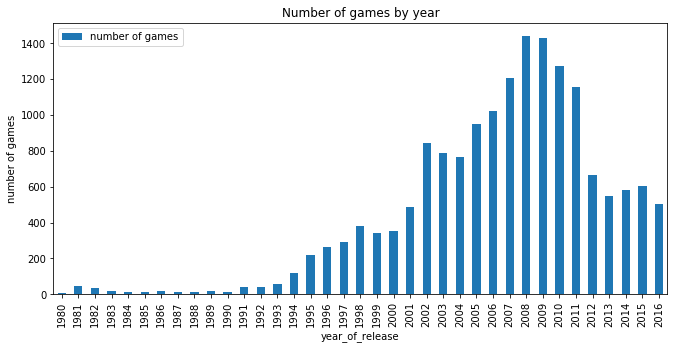

In [19]:
#The game market was not developed before 90's: with few games 
#check number of games by years. 
game_by_year = game_data.pivot_table(index = 'year_of_release',values = 'name' , aggfunc = 'count')
game_by_year.columns=[ 'number of games']
game_by_year.plot.bar(figsize=(11,5))
pl.title("Number of games by year")
pl.xlabel("year_of_release")
pl.ylabel("number of games")

До 2008 мы видим рост и развитие рынка видеоигр, пик развития индустрии приходится на 2008-2009, после пика мы видим спад, предположительно, на рынке после некоторого ажиотажа и перенасыщения, а также после конкуренции остались только наиболее привлекательные игры с точки зрения пользователей и окупаемости

In [20]:
#Display platform by total sales in order to select the most significants
sales_by_platform = game_data.groupby(['platform']).total_sales.sum().sort_values(ascending=False)
sales_by_platform

platform
PS2     1247.16
X360     966.61
PS3      935.19
Wii      903.31
DS       804.28
PS       727.58
PS4      314.14
GBA      313.73
PSP      293.57
PC       258.86
3DS      258.53
XB       256.69
GB       254.43
NES      251.05
N64      218.48
SNES     200.04
GC       198.66
XOne     159.32
2600      89.01
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [21]:
sales_by_platform_year = game_data.groupby(['platform','year_of_release']).total_sales.sum().sort_values(ascending=False)

Text(0, 0.5, 'total sales ($mm)')

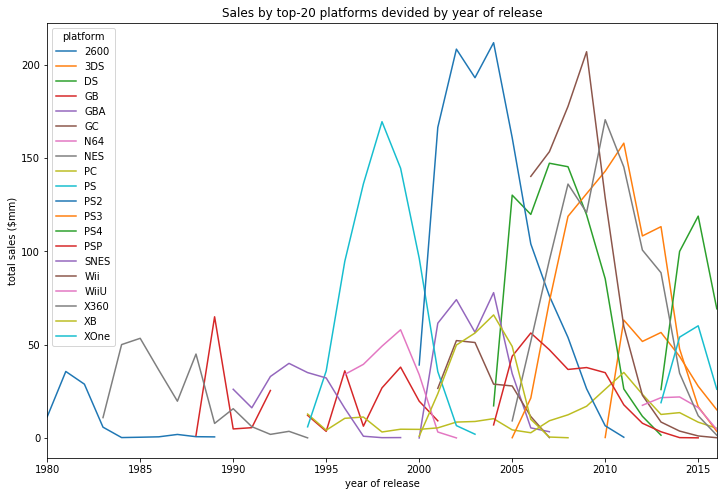

In [22]:
#We select the top 20 platform by total sales.
top_20_platforms = sales_by_platform.head(20).reset_index().platform.to_list()
sales_by_platform_year = sales_by_platform_year.reset_index().query('platform in @top_20_platforms')
#show evolution by year of significant platforms
sales_by_platform_year.pivot('year_of_release', 'platform', 'total_sales').plot(figsize=(12, 8))
pl.title("Sales by top-20 platforms devided by year of release")
pl.xlabel("year of release")
pl.ylabel("total sales ($mm)")

Рассчитаем медианную продолжительность существования платформ

In [23]:
platform_cycle = game_data.pivot_table(index = 'platform', values = 'year_of_release', aggfunc = ['min', 'max'])
platform_cycle.columns = ['min_year','max_year']
platform_cycle['platform_lifecycle']= platform_cycle.max_year - platform_cycle.min_year
print("Median platform lifecycle: {:.0f} years".format(platform_cycle.platform_lifecycle.median()))


Median platform lifecycle: 8 years


Определим актуальный период для анализа с 2014 года для будущего прогноза, чтобы иметь данные за конечный на данный момент интервал развития игровой индустрии по актуальными платформам и продажам 

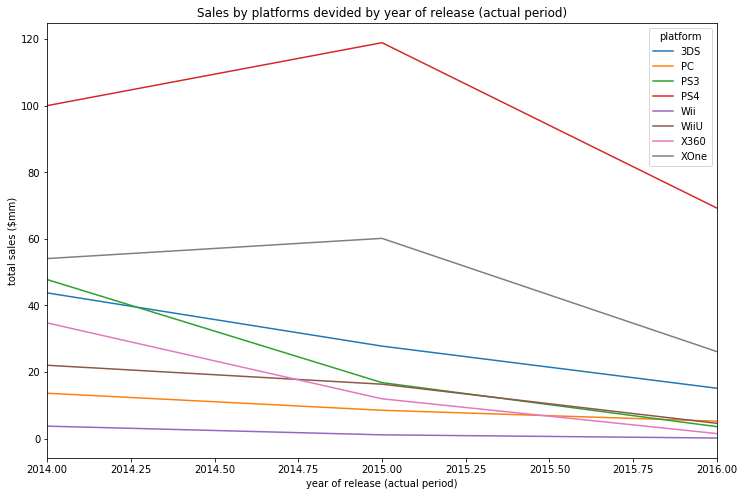

In [24]:
#The platform lifecycle varies between 5 to 8 years (new playstation appear every 6 years)
#we take the actual period from 2014 because we can see last generation
actual_sales_data = sales_by_platform_year.reset_index().query('year_of_release > 2013')
#remove all platform which disapear during the generation 2016
actual_sales_data = actual_sales_data.query('platform not in ["PSP"]')
actual_sales_data.pivot('year_of_release', 'platform', 'total_sales').plot(figsize=(12, 8))
pl.title("Sales by platforms devided by year of release (actual period)")
pl.xlabel("year of release (actual period)")
pl.ylabel("total sales ($mm)")
plt.show()
#remove all platform which disapear during the generation 2016
#actual_sales_data = actual_sales_data.query('platform not in ["PSP"]')
# actual_sales_data.pivot('year_of_release', 'platform', 'total_sales').plot(figsize=(12, 8))
# pl.title("Sales by platforms (lifetime untill 2014 or more) devided by year of release (actual period)")
# pl.xlabel("year of release (actual period)")
# pl.ylabel("total sales ($mm)")


In [25]:
#we calculate growth rate for the actual platforms, Xone and PS4 are rising, other platforms are declining.
#last generation decrease (X360, PS3, Wii) and new generation increase (PS4, XOne)
#some new platform not very succesfull (WiiU, 3DS, PSV)
#living room console: X360, PS3, Wii, XOne, PS4, WiiU
#portable console: 3DS, PSV
actual_sales_data['sales_2015'] = actual_sales_data.query('year_of_release == 2015').total_sales
actual_sales_data['sales_2014'] = actual_sales_data.query('year_of_release == 2014').total_sales
grow_rate = actual_sales_data.groupby(['platform'])[['sales_2014', 'sales_2015']].sum()
grow_rate['growth_rate'] = grow_rate.sales_2015 / grow_rate.sales_2014
grow_rate

,sales_2014,sales_2015,growth_rate
platform,,,
3DS,43.76,27.78,0.634826
PC,13.63,8.52,0.625092
PS3,47.76,16.82,0.352178
PS4,100.00,118.90,1.189000
Wii,3.75,1.14,0.304000
WiiU,22.03,16.35,0.742170
X360,34.74,11.96,0.344272
XOne,54.07,60.14,1.112262


Рассчитав темпы роста платформ: отношение продаж за 2015 год к 2014 (так как за 2016 год неполные данные, мы не брали этот период) - выявили наиболее перспективные: XOne и PS4

### Вывод

- Построив распределение релизов игр по годам, мы отметили, что до 90-x годов ежегодно выпускалось небольшое количество игр, так как гейм индустрия еще не была достаточно развита. Следовательно, данные за эти периоды не будут важны для последующего анализа и прогнозирования.
- Далее методом groupby и sort мы сгруппировали данные по продажам по платформам и отсортировали их в порядке убывания, чтобы найти наиболее прибыльные платформы.
- Мы построили график распределения по платформам с наибольшими суммарными продажами с разбивкой по годам. По данным на графике мы сделали вывод, что средний жизненный цикл платформы 5-7 лет (на примере playstation видно, что новый релиз консоли происходит каждые 6 лет).
- Исходя из анализа предыдущих результатов, мы пришли к выводу, что актуальным периодом является период включающий один жизненный цикл платформы и его смену на новый, поэтому мы отфильтровали данные за период ранее 2005 года.
- Также мы отфильтровали данные по тем платформам, которые закончили свой жизненный цикл до 2016 года, эти платформы не будут учтены в последующем анализе.

#### Шаг 3.2

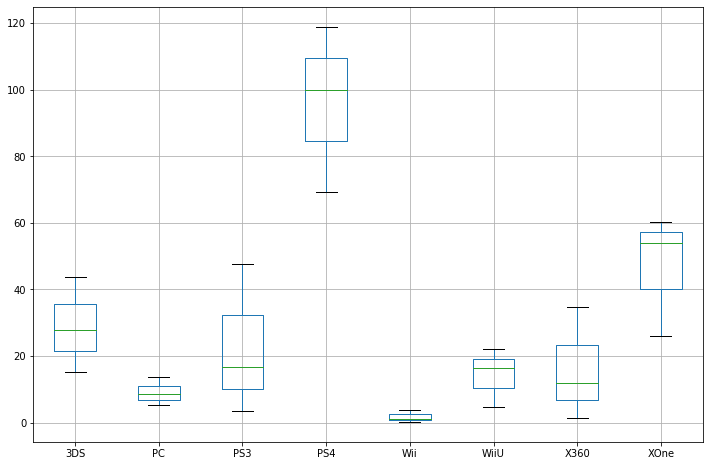

In [26]:
# built boxplot to check total sales distribution by platform
actual_sales_data.pivot(columns='platform', values='total_sales').boxplot(figsize=(12, 8))


Построив диаграммы размаха по продажам можем сделать следующие выводы:
    - Wii: расстояние между первым квартилем и медианой заметно меньше, чем расстояние между медианой и третьим квартилем,график распределен между 0 и 4, что говорит о низких продажах на данной платформе
    - X360: расстояние между первым квартилем и медианой больше, чем расстояние между медианой и третьим квартилем,следовательно датасет скошен влево, можем предположить, что на этой платформе есть игры, которые приносят дохода меньше медианной суммы
    - PS4: расстояние между первым квартилем и медианой равно расстоянию между медианой и третьим квартилем, следовательно датасет распределен нормально
    - XOne расстояние между первым квартилем и медианой равно расстоянию между медианой и третьим квартилем, следовательно датасет распределен нормально
    - у PC мы тоже наблюдаем почти симметричное распределение
    - WiiU видим, что медиана смещена ближе к первому квартилю, следовательно датасет с отрицательной скошенностью, также мы наблюдаем выбросы ниже первого квартиля, это может свидетельствовать о том, что игры на данной платформе имели низкие продажи
    
Наибольшие значения по продажам наблюдаются у платформ нового поколения XOne и PS4

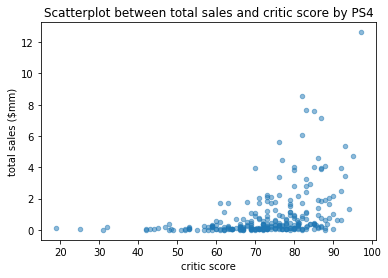

Text(0, 0.5, 'total sales ($mm)')

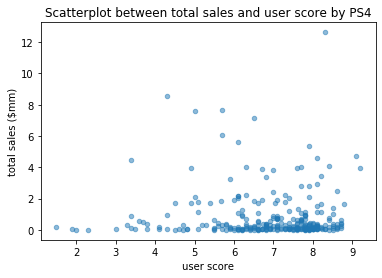

In [27]:
#did scatter plot between total sales and critic/users score to see correlation
all_actual_data = game_data.query('year_of_release > 2013')
all_actual_data.query('platform =="PS4"').groupby(['platform']).plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
pl.title("Scatterplot between total sales and critic score by PS4")
pl.xlabel("critic score")
pl.ylabel("total sales ($mm)")
plt.show()
all_actual_data.query('platform =="PS4"').groupby(['platform']).plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)
pl.title("Scatterplot between total sales and user score by PS4")
pl.xlabel("user score")
pl.ylabel("total sales ($mm)")

In [28]:
#between total_sales and critic_score we can see positive correlation and no correlation between user score and total sales
print("Correlation table between score and sales by platform PS4")
all_actual_data.query('platform =="PS4"')[['critic_score','user_score','total_sales']].corr()


Correlation table between score and sales by platform PS4


,critic_score,user_score,total_sales
critic_score,1.000000,0.551348,0.388726
user_score,0.551348,1.000000,-0.025916
total_sales,0.388726,-0.025916,1.000000


In [29]:
#we select other popular platfom from the actual periode to compare with PS4.
#we can see the correlation between critic score and sales is always higher than user score and sales unless for WiiU.
top_platforms = all_actual_data.query('platform not in ["PSP"]')
for item in top_platforms.platform.unique():
    print()
    print("Correlation table between score and sales by platform {}".format(item))
    display(top_platforms.query('platform == @item')[['critic_score','user_score','total_sales']].corr())
    


Correlation table between score and sales by platform PS4


,critic_score,user_score,total_sales
critic_score,1.000000,0.551348,0.388726
user_score,0.551348,1.000000,-0.025916
total_sales,0.388726,-0.025916,1.000000



Correlation table between score and sales by platform 3DS


,critic_score,user_score,total_sales
critic_score,1.000000,0.589889,0.279768
user_score,0.589889,1.000000,0.244442
total_sales,0.279768,0.244442,1.000000



Correlation table between score and sales by platform XOne


,critic_score,user_score,total_sales
critic_score,1.000000,0.448177,0.379347
user_score,0.448177,1.000000,-0.092406
total_sales,0.379347,-0.092406,1.000000



Correlation table between score and sales by platform WiiU


,critic_score,user_score,total_sales
critic_score,1.000000,0.714357,0.368771
user_score,0.714357,1.000000,0.384179
total_sales,0.368771,0.384179,1.000000



Correlation table between score and sales by platform PS3


,critic_score,user_score,total_sales
critic_score,1.000000,0.298102,0.317972
user_score,0.298102,1.000000,-0.148407
total_sales,0.317972,-0.148407,1.000000



Correlation table between score and sales by platform X360


,critic_score,user_score,total_sales
critic_score,1.000000,0.164429,0.340764
user_score,0.164429,1.000000,-0.132285
total_sales,0.340764,-0.132285,1.000000



Correlation table between score and sales by platform PC


,critic_score,user_score,total_sales
critic_score,1.000000,0.517195,0.179161
user_score,0.517195,1.000000,-0.066875
total_sales,0.179161,-0.066875,1.000000



Correlation table between score and sales by platform Wii


,critic_score,user_score,total_sales
critic_score,1.000000,0.255670,0.330541
user_score,0.255670,1.000000,0.628691
total_sales,0.330541,0.628691,1.000000



Correlation table between score and sales by platform PSV


,critic_score,user_score,total_sales
critic_score,1.000000,0.494708,0.152892
user_score,0.494708,1.000000,-0.056210
total_sales,0.152892,-0.056210,1.000000


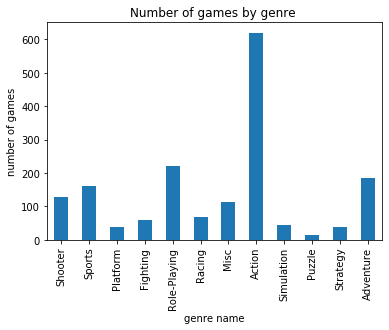

Text(0, 0.5, 'total sales ($mm)')

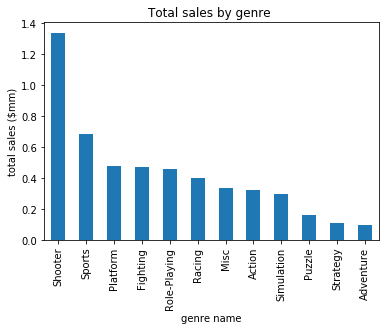

In [30]:
#group by genre 
#calculate correlation rate 
genre_data= all_actual_data.pivot_table(index= 'genre', values = ['total_sales','name'],aggfunc = {'total_sales':'sum','name':'count'})
genre_data['convertional_rate'] = genre_data.total_sales/genre_data.name
genre_data = genre_data.sort_values(by ='convertional_rate',ascending=False)
genre_data.name.plot.bar()
pl.title("Number of games by genre ")
pl.xlabel("genre name")
pl.ylabel("number of games")
plt.show()
genre_data.convertional_rate.plot.bar()
pl.title("Total sales by genre ")
pl.xlabel("genre name")
pl.ylabel("total sales ($mm)")

### Вывод

- Выбрав последние актуальные данные за 2014 и 2015 год (прим. данные за 2016 год могут быть неполными),мы расчитали ratio по платформам и выявили лидирующие по продажам платформы: PS4, XOne. Эти  2 платформы показывают рост в 2015 году на 18% и 11% соответственно по сравнению с 2014 годом. Данные платформы являются платформами нового поколения пришедшими на смену PS3 и X360.
- Построив диаграммы размаха по продажам, мы сделали следующие выводы: данные по продажам по платформам PS4 и XOne нормально распределены, также распределение почти симметрично по данным платформы PC. Данные на диаграме размаха по платформе Wii распределены с положительной скошенностью,следовательно есть продажи игр на этой платформе выше медианных. WiiU является платформой нового поколения(предшественник платформа Wii), однако данные на диаграме размаха свидетельствуют о том, что продажи на этой платформе ниже медианных.
- Построив диаграммы рассеяния и таблицу корреляции между продажами и отзывами пользователей и критиков по популярной платформе PS4, мы отметили прямую корреляцию между продажами и отзывами критиков и не обнаружили корреляции между отзывами пользователей и продажами.
- Аналогичным образом мы соотнесли продажи и отзывы по остальным платформам и выявили схожую ситуацию, исключение составила прямая корреляция между отзывами пользователей и продажами по платформе WiiU, мы предположили, что это корреляция обусловлена низкими отзывами и низкими продажами по платформе.
- Следующим пунктом мы построили график распределения игр по жанрам, наибольшее количество игр было выпущено в жанре Action. Лидерами по продажам являются игры в жанрах Shooter, Platform и Sports. Наиболее низкие продажи у жанра Adventure, причиной может быть устаревшая модель игры Point & Click

### Шаг 4. Составьте портрет пользователя каждого региона

Построим таблицы с разбивкой по регионам. Сгруппируем данные по платформе и по продажам(в данном регионе), в отдельном столбце рассчитаем обьем продаж по платформе относительно всех продаж по региону. Визуализируем полученные данные (доли продаж по каждой платформе в регионе) с помощью графиков pie chart


Top-5 best eu_sales platforms


,eu_sales,percentage
platform,,
PS4,130.04,0.479976
XOne,46.25,0.170708
PS3,25.54,0.094268
PC,18.22,0.067250
3DS,16.12,0.059499
Other,34.76,0.128299


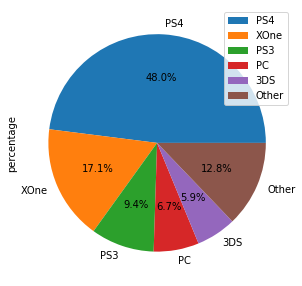


Top-5 best na_sales platforms


,na_sales,percentage
platform,,
PS4,98.61,0.347072
XOne,81.27,0.286041
X360,28.30,0.099606
3DS,22.64,0.079685
PS3,22.05,0.077608
Other,31.25,0.109989


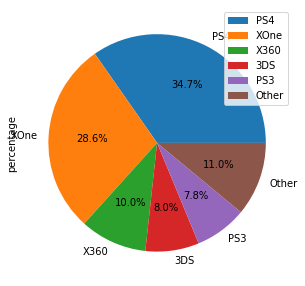


Top-5 best jp_sales platforms


,jp_sales,percentage
platform,,
3DS,44.24,0.475239
PS4,15.02,0.161349
PSV,14.54,0.156193
PS3,11.22,0.120529
WiiU,7.31,0.078526
Other,0.76,0.008164


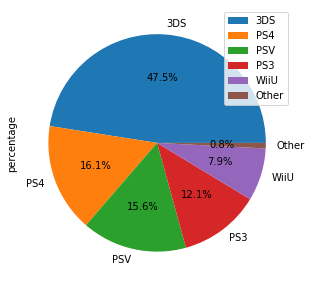

In [31]:
# In japan users prefer to play on portable devices
# In north america, Wii seems more popular than in Europe.
# We can explain this by the more social branding of the Wii.
def show_region_share(region, dimention):
    total_sale = all_actual_data[region].sum()
    region_sales = all_actual_data.pivot_table(index = dimention, values = [region], aggfunc = 'sum').sort_values(by = region, ascending=False).head()
    other = total_sale - region_sales[region].sum()
    region_sales = region_sales.reset_index()
    region_sales = region_sales.append({dimention: 'Other', region: other}, ignore_index=True)
    region_sales = region_sales.set_index(dimention)
    region_sales['percentage'] = region_sales[region] / total_sale
    display(region_sales)
    region_sales.plot.pie(y='percentage', figsize=(5, 5),autopct=lambda x: '{:.1f}%'.format(x))
    plt.show()

region_name=['eu_sales','na_sales','jp_sales']
for item in region_name:
    print()
    print("Top-5 best {} platforms".format(item))
    show_region_share(item, 'platform')


Построим таблицы с разбивкой по регионам. Сгруппируем данные по жанрам и по продажам (в данном регионе), в отдельном столбце рассчитаем обьем продаж по жанрам относительно всех продаж по региону. Визуализируем полученные данные (доли продаж по каждому жанру в регионе) с помощью графиков pie chart


Top-5 best eu_sales genres


,eu_sales,percentage
genre,,
Action,74.93,0.276566
Shooter,65.52,0.241834
Sports,45.73,0.168789
Role-Playing,28.17,0.103975
Racing,14.13,0.052154
Other,42.45,0.156683


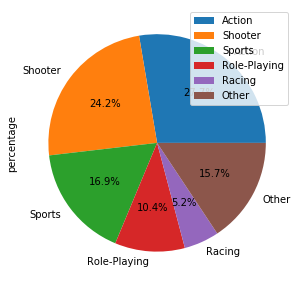


Top-5 best na_sales genres


,na_sales,percentage
genre,,
Shooter,79.02,0.278122
Action,72.59,0.255491
Sports,46.13,0.162361
Role-Playing,33.47,0.117802
Misc,15.05,0.052971
Other,37.86,0.133254


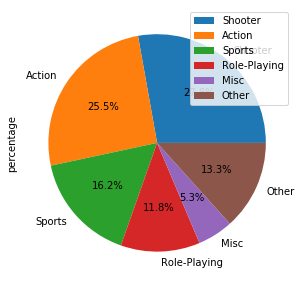


Top-5 best jp_sales genres


,jp_sales,percentage
genre,,
Role-Playing,31.16,0.334730
Action,29.58,0.317757
Fighting,6.37,0.068428
Misc,5.61,0.060264
Shooter,4.87,0.052315
Other,15.50,0.166506


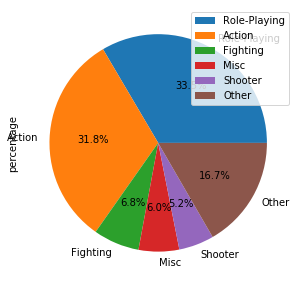

In [32]:
#User portrait is similar between Europe and North America. They prefer Action, Sports and Shooter games.
#In Japan the user is different and prefer Role Playing game. But action game is still popular in Japan.
for item in region_name:
    print()
    print("Top-5 best {} genres".format(item))
    show_region_share(item, 'genre')


Построим таблицы с разбивкой по регионам. Сгруппируем данные по рейтингу ESRB и по продажам (в данном регионе), в отдельном столбце рассчитаем обьем продаж по каждой категории рейтинга относительно всех продаж по региону. Визуализируем полученные данные (доли продаж по каждой категории в регионе) с помощью графиков pie chart

,eu_sales,percentage
rating,,
M,93.69,0.345809
E,58.06,0.214299
T,34.07,0.125752
E10+,26.16,0.096556
Other,58.95,0.217584


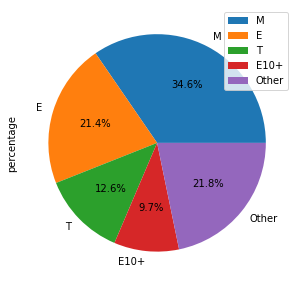

,na_sales,percentage
rating,,
M,96.48,0.339575
E,50.74,0.178587
T,38.95,0.137090
E10+,33.23,0.116958
Other,64.72,0.227791


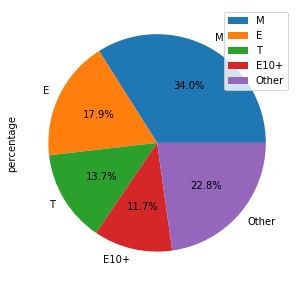

,jp_sales,percentage
rating,,
T,14.78,0.158771
E,8.94,0.096036
M,8.01,0.086046
E10+,4.46,0.047911
Other,56.90,0.611236


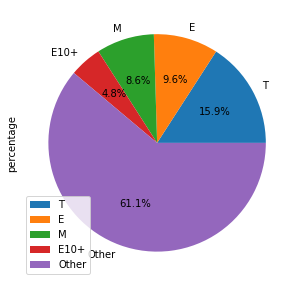

In [33]:
#User portait between North America and Europe is similar.
for item in region_name:
    show_region_share(item, 'rating')


### Вывод

- Построив сводные таблицы продаж по регионам, мы выяснили, что в Северной Америке наиболее популярны платформы - Wii и Xbox, мы предположили, что американские пользователи предпочитают командные игры, поэтому данные платформы в лидерах продаж. В Европе пользователи предпочитают игры на аналогичных платформах, однако продажи по ним почти 2 раза ниже чем в Северной Америке. В Японии популярны консоли локального производителя Nintendo 3DS, мы предположили, что пользователи предпочитают играть в одиночные игры, а так же в свободное время в дороге, поэтому предпочитают портативные консоли
- Построив сводные таблицы жанров по регионам мы выяснили, что в Северной Америке особой популярностью пользуются жанры Action, Sport и Shooter, прибыль по этим жанрам растет, причина в появлении большого количества новинок по этим жанрам, а так же простота игровой механики. Эти же жанры предпочитают и в Европе, однако объем продаж по ним меньше чем в Америке. В Японии самым популярным жанром является Role-Playing game.
- Построив сводные таблицы рейтинга ESRB по регионам, мы заметили, что игры с рейтингами Everyone (E), Mature (M) имеют наибольшую долю продаж как в Северной Америке, так и в Европе. Также мы отметили, что игры с данными рейтингами имели не такой большой объем продаж в Японии, причиной может быть довольно закрытый рынок видеоигр в японии от иностранных компаний. Наиболее популярны в Японии игры с рейтингом Teen (T)

### Шаг 5. Проверка гипотез

In [34]:
#calculate average, std and var by platforms XOne and PC, results will be usefull for further t-test ,var almost equal
stat_data = all_actual_data.query('platform == "XOne"| platform == "PC"').pivot_table(index= 'platform', values = 'user_score',aggfunc= [np.mean,np.median, np.var, np.std, np.max])
stat_data

,mean,median,var,std,amax
,user_score,user_score,user_score,user_score,user_score
platform,,,,,
PC,6.318280,6.8,2.893575,1.701051,9.3
XOne,6.675353,6.9,1.872916,1.368545,9.2


In [35]:
#create a segment by platform XOne
Xbox_rate = all_actual_data.query('platform == "XOne"')['user_score'].reset_index()
#do segment by platform PC
PC_rate = all_actual_data.query('platform == "PC"')['user_score'].reset_index()

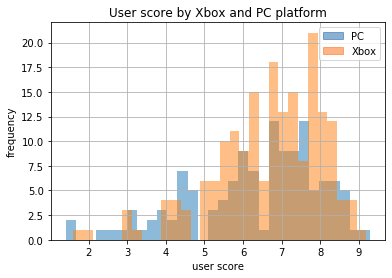

In [36]:
#create a hist to check distribution
pl.title("User score by Xbox and PC platform")
pl.xlabel("user score")
pl.ylabel("frequency")
PC_patch = mpatches.Patch(color='#1B62A5', alpha=0.5, label='PC')
Xbox_patch = mpatches.Patch(color='#FD690F', alpha=0.5, label='Xbox')
plt.legend(handles=[PC_patch, Xbox_patch])
PC_rate.user_score.hist(alpha=0.5,bins = 30)
Xbox_rate.user_score.hist(alpha=0.5, bins = 30)

Так как H₀ всегда формулируется так, чтобы использовать знак равенства, наша нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые(равны). Исходя из H₀ наша альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковы(не равны).
Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, мы использовали t-тест: применили метод scipy.stats.ttest_ind (array1, array2, equal_var) . Так как значения дисперсий почти равны указали equal_var - True по дефолту

In [37]:
#do t-test to prove hypothesis, alfa 5% by default

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    Xbox_rate.user_score, 
    PC_rate.user_score, nan_policy="omit")

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")



p-значение: 0.041420459453229835
Отвергаем нулевую гипотезу


Полученное значение p-value менее критического уровня значимости, это значит, что мы можем отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC 

In [38]:
#calculate average, std and var by genres Action and Sports results will be usefull for further t-test
stat_data = all_actual_data.query('genre == "Action"| genre == "Sports"').pivot_table(index= 'genre', values = 'user_score',aggfunc= [np.mean,np.median, np.var, np.std, np.max])
stat_data

,mean,median,var,std,amax
,user_score,user_score,user_score,user_score,user_score
genre,,,,,
Action,6.793966,7.1,1.904411,1.380004,9.1
Sports,5.186972,5.5,3.305237,1.818031,8.8


In [39]:
#create a segment by genre Action
Action_rate = all_actual_data.query('genre == "Action"')['user_score'].reset_index()
#do segment by genre Sports
Sports_rate = all_actual_data.query('genre == "Sports"')['user_score'].reset_index()


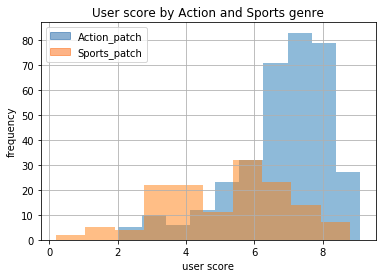

In [40]:
#create a hist to check distribution
pl.title("User score by Action and Sports genre")
pl.xlabel("user score")
pl.ylabel("frequency")
Action_patch = mpatches.Patch(color='#1B62A5', alpha=0.5, label='Action_patch')
Sports_patch = mpatches.Patch(color='#FD690F', alpha=0.5, label='Sports_patch')
plt.legend(handles=[Action_patch, Sports_patch])
Action_rate.user_score.hist(alpha=0.5)
Sports_rate.user_score.hist(alpha=0.5)

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports разные (не равны).

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, мы использовали t-тест: применили метод scipy.stats.ttest_ind (array1, array2, equal_var) . В качестве альфа приняли общепринятое пороговое значение — 5%

In [41]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    Action_rate.user_score, 
    Sports_rate.user_score, nan_policy="omit")

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 7.659539395331613e-24
Отвергаем нулевую гипотезу


Полученное значение p-value меньше критического уровня значимости, это значит, что мы можем отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports, следовательно можем предположить , что они разные

### Шаг 6. Общий вывод

Задача — установить параметры определяющие успешность компьютерной игры с целью возможности прогнозирования рекламных кампаний.

На первом этапе анализа из открытых источников мы получили сырые данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах до 2016 года. Далее мы проверили типы данных методом info и обнаружили, что не все данные содержат корректный тип. Методом isna.sum() мы выявили количество пропущенных значений в каждом столбце. Также, изучив датасет, мы заметили, что в столбце user_score содержатся числовые и строковые(tbd) значения.

Второй этап состоял из подготовки данных к анализу. Мы отфильтровали пропущенные значения в столбце year_of_release, так как они составляли меньше 1,5% от всего датасета и поменяли тип данных на целочисленный. Так как в остальных столбцах с пропущенными значениями последние составляли более 40%, без возможности логической замены, мы приняли решение оставить эти значения без изменений. В одном из столбцов мы заметили аббревиатуру tbd и предположив, что это значение эквивалентно значению о недостаточном количестве данных, мы заменили tbd на None, получив при этом возможность поменять тип данных на float. Также мы добавили дополнительную метрику о сумме всех продаж в отдельный столбец.

На третьем этапе анализа мы построили распределение релизов игр по годам и пришли к выводу, что некоторые данные являются устаревшими(начало гейм индустрии) и мы можем не учитывать их в дальнейшем. Далее с помощью графика plot мы построили распределение продаж по платформам в разбивке по годам и пришли к выводу, что средний жизненный цикл платформы занимает около 5-7 лет, поэтому для последующего прогнозирования мы отфильтровали данные до 2005 года, оставив один полный жизненный цикл платформ и его смену на новое поколение.

Следующим пунктом третьего этапа мы рассчитали отношение продаж 2015 года и 2014 и выяснили, что некоторые платформы не смотря на значительную прибыль теряют позиции в росте обьема продаж, а некоторые новые платформы (XOne,PS4) начинают активно расти. Далее мы построили диаграммы размаха продаж по платформам и выяснили, что данные по продажам на платформах нового поколения Xone и PS4 распределены нормально, то есть медиана совпадает со средним значением. По платформе WiiU(новое поколение) мы обнаружили, что датасет скошен влево, то есть продажи меньше медианных, а там же обнаружили выбросы ниже 1 квартиля, что говорит об аномально низких продажах.Далее с помощью графика Scatterplot и метода corr() мы обнаружили корреляцию между продажами и оценками критиков и не обнаружили корреляции между продажами и пользовательскими оценками, скорее всего данные в этом столбце довольно субьективны и при дальнейшем прогнозировании мы будем опираться на оценки критиков.Следующим шагом мы сгруппировали данные продаж по жанрам и выяснили, что лидерами продаж являются игры в жанрах Shooter, Platform, Sports.Мы предположии, что механика в данных играх может быть проста для большинства пользователей, а так же релизы большого количества новинок по этим жанрам могут являться причинами лидерства этих жанров.

Четвертым этапом мы проанализировали поведение пользователей по регионам. Вначале мы выделили топ 5 платформ в каждом регионе и предположили, что в Северной Америке и Европе пользователи предпочитают платформы, где возможно участие нескольких пользователей (командные игры). В Японии пользователи предпочитают портативные консоли от локального производителя, так как данные платформы позволяют пользователям играть в дороге или др. местах. Далее мы разбили продажи по регионам и жанрам и выяснили, что в Северной Америке и Европе популярны жанры  Action, Sports, Shooter, однако в обьем продаж в Европе уступает продажам в Америке. В Японии самым популярным является жанр Role-Playing game. Также распределив данные продаж по регионам и рейтингу ESRB мы выяснили интересный факт, о том, что игры с рейтингами Adults Only(AO), Early Childhood(EC) и Rating Pending (RP) не имеют продаж в Японии,так как маркет видеоигр в Японии довольно закрытый, мы предположили, что игры с данными рейтингами или без него(Rating Pending) не продаются в Японии и локальные производители также не выпускают игры с данным контентом.

Заключительным этапом анализа была проверка гипотез. Выделив две платформы: новая растущая в продажах консоль XOne и стабильно существующий на рынке персональный компьютер, мы вычислили статистически значимые метрики  по оценкам пользователей и выяснили, что дисперсии на обоих платформах почти равны. Основываясь на этих данных мы предположили, что средние пользовательские рейтинги платформ Xbox One и PC могут быть одинаковы. Для того чтобы определить противоречат ли данные нашей гипотезе, мы с помощью t-test, метода scipy.stats.ttest_ind (array1, array2, equal_var) выяснили, что полученное значение p-value менее критического уровня значимости (в качестве альфа приняли общепринятое пороговое значение — 5%), это значит, что мы можем отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC.

Следующей нашей нулевой гипотезой было равенство cредних пользовательских рейтингов жанров Action и Sports, соответственно альтернативная гипотеза заключалась в том, что средние пользовательские рейтинги не равны. Используя t-test, метод scipy.stats.ttest_ind (array1, array2, equal_var) выяснили, что полученное значение p-value больше критического уровня значимости (в качестве альфа приняли общепринятое пороговое значение — 5%), а это значит, что мы не можем отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports, следовательно не можем предполагать , что они равны.
